<h1><u>"Stroke - Cerebrovascular Accidents __ Solution to a classification problem"</h1></u>
<br>
<h2>DATA SCIENCE:</h2>
<ul>
   <li>González Pluchino, Leandro</li>
</ul>

![Imagen](https://www.edureka.co/blog/wp-content/uploads/2019/11/classification.png)

## Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import the libraries and functions that we are going to use


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate
import seaborn as sns
import plotly.express as px

In [ ]:
#Define the functions to be used
def plot_pie_value_count(
    target_column, 
    df, 
    label_dict = None,
    autopct = '%1.1f%%', 
    title = 'Chart', 
    title_fontweight = 'bold',
    title_fontstyle = 'italic', title_fontsize  = 14,
    ):
    labels = []
    if isinstance(label_dict, dict):
        for i in range(df[target_column].value_counts().shape[0]):
            labels.append(label_dict[df[target_column].value_counts().index[i]])
    elif label_dict is None:
        labels = df[target_column].value_counts().index
    else:
        raise NotImplementedError('Pass a Dictionary or None')
    plt.figure(figsize=(4,6))
    plt.setp(autotexts, size='x-small')
    autotexts[0].set_color('white')
    plt.pie(df[target_column].value_counts(), labels = labels, autopct = autopct, wedgeprops={"linewidth":2,"edgecolor":"white"}, shadow=True, center=(0,0))
    plt.title(title, fontsize = title_fontsize, fontweight = title_fontweight, fontstyle = title_fontstyle)
    plt.show()


In [ ]:
#We define the functions we are going to use to display the data
def plot_chances(
  target_column,
  chance_column,
  df,
  figsize = (4, 2),
  labels = None,
  x_tick_labels = None,
  x_label = 'X',
  y_label = 'Y',
  title = 'Title',
  title_fontweight = 'bold',
  title_fontstyle = 'italic',
  title_fontsize = 14,
  ):

  if labels is None:
      labels = list(df[target_column].unique())
  if x_tick_labels is None:
      x_tick_labels = labels
  fig, ax = plt.subplots(figsize = figsize, )
  if isinstance(labels, tuple):
      start = labels[0]
      end = labels[1]
      step = labels[2]
      start_labels = np.arange(start, end, step)
      for i in np.arange(len(start_labels)):
          plt.bar(i, df[(df[target_column] > start_labels[i]) & (df[target_column] < (start_labels[i] + step))][chance_column].mean())
      ax.set_xlabel(x_label)
      ax.set_ylabel(y_label)
      ax.set_xticks(np.arange(len(start_labels)))
      x_tick_labels = [f'{i}-{i+step}' for i in start_labels]
      ax.set_xticklabels(x_tick_labels)
  else:
      for i in np.arange(len(labels)):
          plt.bar(i, df[df[target_column] == labels[i]][chance_column].mean())
      
      ax.set_xlabel(x_label)
      ax.set_ylabel(y_label)
      ax.set_xticks(np.arange(len(labels)))
      if isinstance(x_tick_labels, dict):
          x_tick_labels_list = [i for i in np.arange(len(labels))]
          for i in labels:
              x_tick_labels_list[labels.index(i)] = x_tick_labels[i]
          ax.set_xticklabels(x_tick_labels_list)
      else:
          ax.set_xticklabels(x_tick_labels)

  plt.title(title, fontweight = title_fontweight, fontstyle = title_fontstyle, fontsize = title_fontsize)
  plt.show()

# Import the dataset

In [ ]:
#Import the dataset based on its location in a google drive folder
path="/content/drive/MyDrive/data/Classification.csv"
df=pd.read_csv(path)
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


### Extended Dataset

In [ ]:
path="/content/drive/MyDrive/dataset_ampliado.csv"
df=pd.read_csv(path)

In [ ]:
dfnull = df[["bmi", "smoking_status"]].isnull().any(axis=1)
df = df[~dfnull]

df["stroke"].value_counts()

0    28524
1      548
Name: stroke, dtype: int64

In [ ]:
df_0 = df[df["stroke"] == 0]
df_0.shape

(28524, 12)

In [ ]:
df_1 = df[df["stroke"] == 1]
df_1.shape

(548, 12)

In [ ]:
import random
list_int = list(range(0, df_0.shape[0]))
rnd_int = random.sample(list_int, k=df_1.shape[0]*3)

df_0 = df_0.iloc[rnd_int]
df_0.shape

(1644, 12)

In [ ]:
df = pd.concat([df_0, df_1], axis = 0)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
28748,17185,Male,55.0,0,0,Yes,Private,Rural,213.74,35.8,formerly smoked,0
6659,63412,Female,19.0,0,0,No,Private,Rural,73.53,29.6,never smoked,0
37837,627,Female,67.0,1,0,Yes,Private,Rural,115.66,24.2,never smoked,0
11503,36655,Male,56.0,0,0,Yes,Private,Urban,85.49,22.3,never smoked,0
9618,51340,Female,54.0,0,0,Yes,Private,Urban,117.58,28.6,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43076,32552,Male,79.0,0,1,Yes,Self-employed,Urban,88.29,36.0,never smoked,1
43119,4138,Male,76.0,0,0,Yes,Self-employed,Rural,93.38,26.7,formerly smoked,1
43148,25110,Female,56.0,0,0,Yes,Private,Rural,83.27,32.9,smokes,1
43304,35057,Female,80.0,0,0,Yes,Self-employed,Urban,75.91,26.7,never smoked,1


# Exploratory analysis

In [ ]:
# We see the dimensions of the base with the shape method
df.shape
print("Filas:",df.shape[0],"/ Columnas:", df.shape[1])

Filas: 2192 / Columnas: 12


In [ ]:
#List the dataframe fields
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
#We analyze the information in the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2192 entries, 28748 to 43318
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2192 non-null   int64  
 1   gender             2192 non-null   object 
 2   age                2192 non-null   float64
 3   hypertension       2192 non-null   int64  
 4   heart_disease      2192 non-null   int64  
 5   ever_married       2192 non-null   object 
 6   work_type          2192 non-null   object 
 7   Residence_type     2192 non-null   object 
 8   avg_glucose_level  2192 non-null   float64
 9   bmi                2192 non-null   float64
 10  smoking_status     2192 non-null   object 
 11  stroke             2192 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 222.6+ KB


In [ ]:
#We obtain relevant values on the dataset
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000
mean,36704.475365,52.534215,0.157391,0.086223,112.893485,30.049681,0.250000
std,21292.656675,19.568175,0.364252,0.280757,51.172553,7.181657,0.433112
min,80.000000,10.000000,0.000000,0.000000,55.010000,14.300000,0.000000
25%,18329.000000,37.000000,0.000000,0.000000,77.790000,25.000000,0.000000
50%,37253.500000,54.000000,0.000000,0.000000,94.415000,29.100000,0.000000
75%,55220.250000,69.000000,0.000000,0.000000,126.640000,33.800000,0.250000
max,72926.000000,82.000000,1.000000,1.000000,271.740000,89.000000,1.000000


In [ ]:
#The percentage of null values in each of the columns is calculated.
df_not_nulls= df.notnull().sum(axis=0) / len(df)
df_not_nulls.round(4).sort_values(ascending = False)

id                   1.0
gender               1.0
age                  1.0
hypertension         1.0
heart_disease        1.0
ever_married         1.0
work_type            1.0
Residence_type       1.0
avg_glucose_level    1.0
bmi                  1.0
smoking_status       1.0
stroke               1.0
dtype: float64

In [ ]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
#Identificamos cada una de las categorias de las columnas no numericas
print(df['gender'].unique())
print(df['hypertension'].unique())
print(df['heart_disease'].unique())
print(df['ever_married'].unique())
print(df['work_type'].unique())
print(df['Residence_type'].unique())
print(df['smoking_status'].unique())
print(df['stroke'].unique())

['Male' 'Female']
[0 1]
[0 1]
['Yes' 'No']
['Private' 'Govt_job' 'Self-employed' 'Never_worked' 'children']
['Rural' 'Urban']
['formerly smoked' 'never smoked' 'smokes']
[0 1]


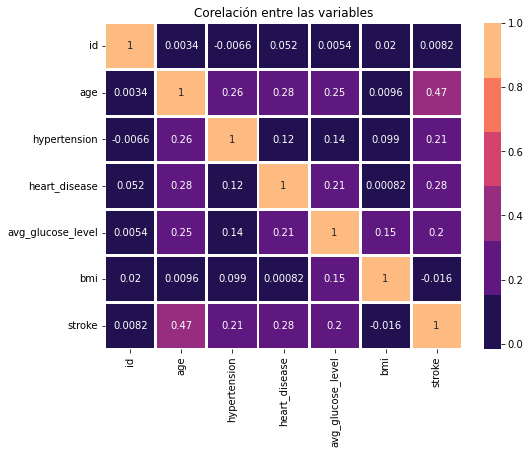

In [ ]:
#Correlation analysis
correlation = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation,annot=True,
            cmap=sns.color_palette("magma"),
            linewidth=2,edgecolor="k")
plt.title("Corelación entre las variables")
plt.show()

In [ ]:
#Age distribution
fig = px.histogram(df, x="bmi", range_x=[10,55], title="Indice de masa corporal")
fig.update_traces(xbins=dict(
        start=0.0,
        end=500,
        size=2.5,
    ))
#we add the average
fig.add_vline(x=28.5, line_color="green")
fig.show()

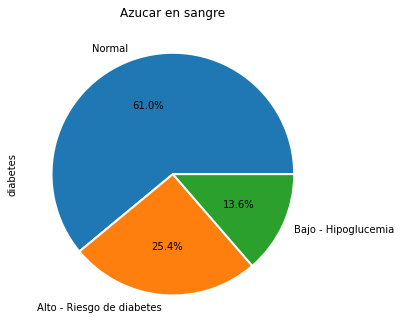

In [ ]:
#Risk Factors
#Glucose
fig = px.histogram(df, x="avg_glucose_level", range_x=[50,300], title="Niveles de glucosa")
#the size of the intervals are as follows
fig.update_traces(xbins=dict(
        start=0.0,
        end=500,
        size=10,
    ))
#we add the average
fig.add_vline(x=105.94, line_color="green")
fig.show()

def clas_diab(x):
    if x>125:
        return "Alto - Riesgo de diabetes"
    elif x<70:
        return "Bajo - Hipoglucemia"
    else:
        return "Normal"
df_fr=df
df_fr["diabetes"]=df.avg_glucose_level.apply(clas_diab)
plt.figure(figsize=(6,5.58))
df_fr.diabetes.value_counts().plot.pie(autopct="%.1f%%", wedgeprops={"linewidth":2,"edgecolor":"white"});
plt.title("Azucar en sangre")
plt.show()



In [ ]:
#we analyze the categorical columns of the dataset
df["work_type"].value_counts()

Private          1398
Self-employed     451
Govt_job          303
children           32
Never_worked        8
Name: work_type, dtype: int64

In [ ]:
df["Residence_type"].value_counts()

Rural    1114
Urban    1078
Name: Residence_type, dtype: int64

In [ ]:
df["smoking_status"].value_counts()

never smoked       1174
formerly smoked     561
smokes              457
Name: smoking_status, dtype: int64

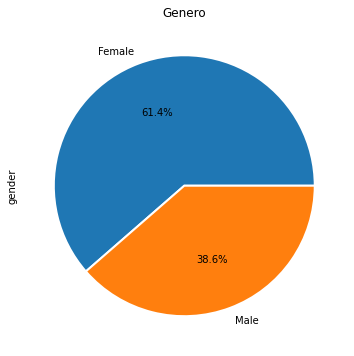

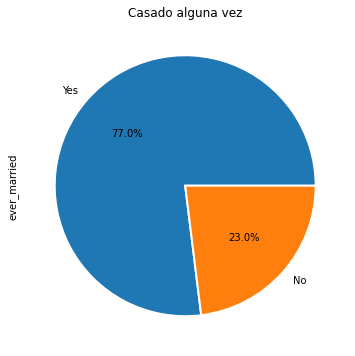

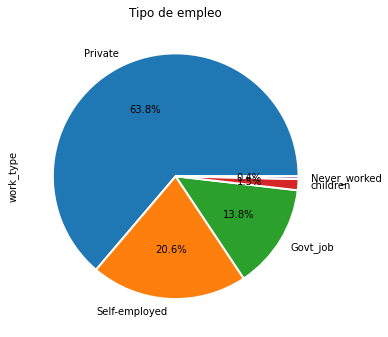

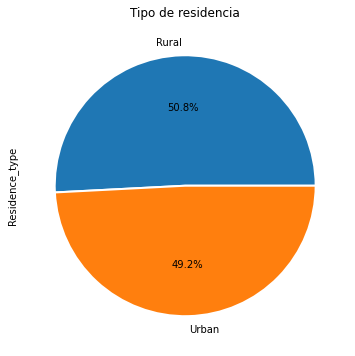

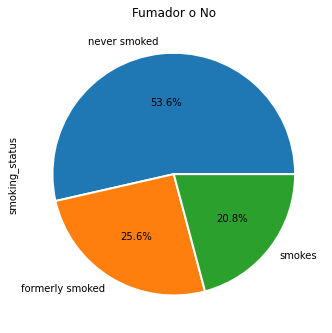

In [ ]:
plt.figure(figsize=(6,6))
df.gender.value_counts().plot.pie(autopct="%.1f%%", wedgeprops={"linewidth":2,"edgecolor":"white"});
plt.title("Genero")
plt.show()

plt.figure(figsize=(6,6))
df.ever_married.value_counts().plot.pie(autopct="%.1f%%", wedgeprops={"linewidth":2,"edgecolor":"white"});
plt.title("Casado alguna vez")
plt.show()

plt.figure(figsize=(6,5.65))
df.work_type.value_counts().plot.pie(autopct="%.1f%%", wedgeprops={"linewidth":2,"edgecolor":"white"});
plt.title("Tipo de empleo")
plt.show()

plt.figure(figsize=(6,6))
df.Residence_type.value_counts().plot.pie(autopct="%.1f%%", wedgeprops={"linewidth":2,"edgecolor":"white"});
plt.title("Tipo de residencia")
plt.show()

plt.figure(figsize=(6,5.58))
df.smoking_status.value_counts().plot.pie(autopct="%.1f%%", wedgeprops={"linewidth":2,"edgecolor":"white"});
plt.title("Fumador o No")
plt.show()

# Dataset Preparation

In [ ]:
#We categorize age into ranges
def age_cohort(age):
    if   age >= 0 and age <= 20:
        return "0-20"
    elif age > 20 and age <= 40:
        return "20-40"
    elif age > 40 and age <= 50:
        return "40-50"
    elif age > 50 and age <= 60:
        return "50-60"
    elif age > 60:
        return "60+"

In [ ]:
df_copy = df.copy()
df_copy['age_group'] = df_copy['age'].apply(age_cohort)
df_copy.sort_values('age_group', inplace = True)

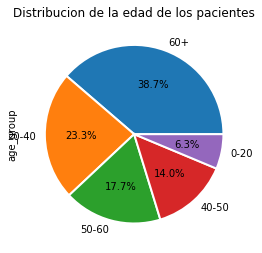

In [ ]:
plt.figure(figsize=(4,6))
df_copy.age_group.value_counts().plot.pie(autopct="%.1f%%", wedgeprops={"linewidth":2,"edgecolor":"white"});
plt.title("Distribucion de la edad de los pacientes")
plt.show()


# Preparation of training and test sets

In [ ]:
#dummify categorical columns
dummies_gender = pd.get_dummies(df['gender'],drop_first=True)
dummies_ever_married = pd.get_dummies(df['ever_married'],drop_first=True)
dummies_work_type = pd.get_dummies(df['work_type'],drop_first=True)
dummies_Residence_type = pd.get_dummies(df['Residence_type'],drop_first=True)
dummies_smoking_status = pd.get_dummies(df['smoking_status'],drop_first=True)

#we eliminated the columns that were dummiefied, together with the diabetes column that we used only for exploratory analysis purposes.
df = df.drop(['gender','ever_married','work_type','work_type','Residence_type','smoking_status', 'diabetes'], axis=1)

#we concatenate the dummy columns with the rest of the dataset
df = pd.concat([df, dummies_gender, dummies_ever_married, dummies_work_type, dummies_Residence_type, dummies_smoking_status],axis=1)

#we rename the column (dummy) 'yes' to 'married' for better comprehension
df['married'] = df['Yes']
df = df.drop(['Yes'], axis=1)
df

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Male,Never_worked,Private,Self-employed,children,Urban,never smoked,smokes,married
28748,17185,55.0,0,0,213.74,35.8,0,1,0,1,0,0,0,0,0,1
6659,63412,19.0,0,0,73.53,29.6,0,0,0,1,0,0,0,1,0,0
37837,627,67.0,1,0,115.66,24.2,0,0,0,1,0,0,0,1,0,1
11503,36655,56.0,0,0,85.49,22.3,0,1,0,1,0,0,1,1,0,1
9618,51340,54.0,0,0,117.58,28.6,0,0,0,1,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43076,32552,79.0,0,1,88.29,36.0,1,1,0,0,1,0,1,1,0,1
43119,4138,76.0,0,0,93.38,26.7,1,1,0,0,1,0,0,0,0,1
43148,25110,56.0,0,0,83.27,32.9,1,0,0,1,0,0,0,0,1,1
43304,35057,80.0,0,0,75.91,26.7,1,0,0,0,1,0,1,1,0,1


In [ ]:
#we define the inputs and the target column of the model
X = df.drop(['stroke'], axis=1)
Y = df['stroke']

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, shuffle=True, random_state = 4, stratify=Y)

In [ ]:
 #we scale training and testing inputs
scaler = StandardScaler()

X_Train_sc = scaler.fit_transform(X_Train)
X_Test_sc = scaler.fit_transform(X_Test)

In [ ]:
def metrics(conf_mat):
  tn = conf_mat[0,0]
  fp = conf_mat[0,1]
  tp = conf_mat[1,1]
  fn = conf_mat[1,0]
  accuracy  = (tp + tn) / (tp + fp + tn + fn)
  precision = tp / (tp + fp)
  recall    = tp / (tp + fn)
  f1score  = 2 * precision * recall / (precision + recall)
  specificity = tn / (tn + fp)
  print(f'Accuracy : {accuracy}')
  print(f'Precision: {precision}')
  print(f'Recall   : {recall}')
  print(f'F1 score : {f1score}')
  print(f'Specificity : {specificity}')

# Modeling with Naive Bayes

### GaussianNB

In [ ]:
#we started the model
gnb = GaussianNB()

In [ ]:
#we train a model with unscaled inputs
gnb.fit(X_Train, Y_Train)

Y_Pred = gnb.predict(X_Test)
Y_Pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,

In [ ]:
round(accuracy_score(Y_Test, Y_Pred), 2)

0.74

In [ ]:
#Confusion matrix
conf_mat = confusion_matrix(Y_Test, Y_Pred)

print('Confusion matrix\n\n', conf_mat)

Confusion matrix

 [[335  76]
 [ 65  72]]


In [ ]:
metrics(conf_mat)

Accuracy : 0.7427007299270073
Precision: 0.4864864864864865
Recall   : 0.5255474452554745
F1 score : 0.5052631578947369
Specificity : 0.8150851581508516


In [ ]:
gnb.fit(X_Train_sc, Y_Train)

Y_Pred_sc = gnb.predict(X_Test_sc)
Y_Pred_sc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
round(accuracy_score(Y_Test, Y_Pred_sc), 2)

0.75

In [ ]:
conf_mat_sc = confusion_matrix(Y_Test, Y_Pred_sc)

print('Confusion matrix\n\n', conf_mat_sc)

Confusion matrix

 [[411   0]
 [137   0]]


In [ ]:
metrics(conf_mat_sc)

Accuracy : 0.75
Precision: nan
Recall   : 0.0
F1 score : nan
Specificity : 1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning:

invalid value encountered in long_scalars



### MultinomialNB

In [ ]:
#we started the model
mnb = MultinomialNB()

In [ ]:
#we train a model with the inputs not scaled
mnb.fit(X_Train, Y_Train)

Y_Pred = mnb.predict(X_Test)
Y_Pred

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,

In [ ]:
round(accuracy_score(Y_Test, Y_Pred), 2)

0.58

In [ ]:
#Confusion matrix
conf_mat = confusion_matrix(Y_Test, Y_Pred)

print('Confusion matrix\n\n', conf_mat)

Confusion matrix

 [[239 172]
 [ 58  79]]


In [ ]:
metrics(conf_mat)

Accuracy : 0.5802919708029197
Precision: 0.3147410358565737
Recall   : 0.5766423357664233
F1 score : 0.40721649484536077
Specificity : 0.5815085158150851


### Numeric GaussianNB

In [ ]:
df_num=pd.read_csv(path).drop(['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'],axis=1)

X_num = df_num.drop(['stroke'], axis=1)
Y_num = df_num['stroke']

X_Train_num, X_Test_num, Y_Train_num, Y_Test_num = train_test_split(X_num, Y_num, shuffle=True, random_state = 4, stratify=Y)

gnb_num = GaussianNB()
gnb_num.fit(X_Train_num, Y_Train_num)

Y_Pred_num = gnb_num.predict(X_Test_num)

round(accuracy_score(Y_Test_num, Y_Pred_num), 2)

ValueError: ignored

In [ ]:
#Confusion matrix
conf_mat_num = confusion_matrix(Y_Test_num, Y_Pred_num)

print('Confusion matrix\n\n', conf_mat_num)

metrics(conf_mat_num)

NameError: ignored

### Categorical GaussianNB

In [ ]:
df_cat=pd.read_csv(path).drop(['age', 'avg_glucose_level', 'bmi'],axis=1)

#we dummify the categorical columns
dummies_gender = pd.get_dummies(df_cat['gender'],drop_first=True)
dummies_ever_married = pd.get_dummies(df_cat['ever_married'],drop_first=True)
dummies_work_type = pd.get_dummies(df_cat['work_type'],drop_first=True)
dummies_Residence_type = pd.get_dummies(df_cat['Residence_type'],drop_first=True)
dummies_smoking_status = pd.get_dummies(df_cat['smoking_status'],drop_first=True)

#we eliminate the columns that were dummified
df_cat = df_cat.drop(['gender','ever_married','work_type','work_type','Residence_type','smoking_status'], axis=1)

#we concatenate the dummy columns with the rest of the dataset
df_cat = pd.concat([df_cat, dummies_gender, dummies_ever_married, dummies_work_type, dummies_Residence_type, dummies_smoking_status],axis=1)

#we rename the column (dummy) 'yes' to 'married' for better comprehension
df_cat['married'] = df_cat['Yes']
df_cat = df_cat.drop(['Yes'], axis=1)

X_cat = df_cat.drop(['stroke'], axis=1)
Y_cat = df_cat['stroke']

X_Train_cat, X_Test_cat, Y_Train_cat, Y_Test_cat = train_test_split(X_cat, Y_cat, shuffle=True, random_state = 4, stratify=Y)

gnb_cat = GaussianNB()
gnb_cat.fit(X_Train_cat, Y_Train_cat)

Y_Pred_cat = gnb_cat.predict(X_Test_cat)

round(accuracy_score(Y_Test_cat, Y_Pred_cat), 2)

ValueError: ignored

In [ ]:
#Confusion matrix
conf_mat_cat = confusion_matrix(Y_Test_cat, Y_Pred_cat)

print('Confusion matrix\n\n', conf_mat_cat)

metrics(conf_mat_cat)

NameError: ignored

### Numerical & Categorical GaussianNB

In [ ]:
Y_Pred_num=gnb_num.predict_proba(X_Test_num)

Y_Pred_num

NameError: ignored

In [ ]:
Y_Pred_cat=gnb_cat.predict_proba(X_Test_cat)

Y_Pred_cat

array([[9.30977379e-01, 6.90226205e-02],
       [1.00000000e+00, 3.40917483e-42],
       [8.99961050e-01, 1.00038950e-01],
       ...,
       [8.09830931e-01, 1.90169069e-01],
       [9.97051190e-01, 2.94880978e-03],
       [9.36819842e-01, 6.31801579e-02]])

In [ ]:
(Y_Pred_cat[0] * Y_Pred_num[0])/(Y_Pred_cat[0] * Y_Pred_num[0]).sum()

array([0.98626404, 0.01373596])

In [ ]:
clases=gnb_num.classes_

In [ ]:
y_predcn=[]
for i in range(0,len(Y_Test)):
    proba=(Y_Pred_num[i] * Y_Pred_cat[i])/(Y_Pred_num[i] * Y_Pred_cat[i]).sum()
    y_predcn.append(clases[np.argmax(proba)])
y_predcn=np.array(y_predcn)

In [ ]:
accuracy_score(Y_Test, y_predcn)

0.7171532846715328

## MixedNB

In [ ]:
!pip install git+https://github.com/remykarem/mixed-naive-bayes#egg=mixed-naive-bayes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/remykarem/mixed-naive-bayes to /tmp/pip-install-xoi6test/mixed-naive-bayes_954e6dcff8624cb4b1d43dc695d951dd
  Running command git clone -q https://github.com/remykarem/mixed-naive-bayes /tmp/pip-install-xoi6test/mixed-naive-bayes_954e6dcff8624cb4b1d43dc695d951dd


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
Y_enc = label_encoder.fit_transform(Y)

In [ ]:
label_encoder.classes_

array([0, 1])

In [ ]:
X_Train_enc, X_Test_enc, Y_Train_enc, Y_Test_enc = train_test_split(X, Y_enc,random_state=666, stratify=Y) 

In [ ]:
from mixed_naive_bayes import MixedNB

clf = MixedNB()
clf.fit(X_Train_enc,Y_Train_enc)
Y_Pred_mix =clf.predict(X_Test_enc)

In [ ]:
accuracy_score(Y_Test_enc, Y_Pred_mix)

0.7700729927007299

# Logistic Regression Modeling

In [ ]:
logistic_regression = LogisticRegression()

In [ ]:
logistic_regression.fit(X_Train, Y_Train)

print(logistic_regression.coef_)
print(logistic_regression.intercept_)

Y_Pred = logistic_regression.predict(X_Test)

Y_Pred

[[-8.99670034e-06  3.85732006e-02  1.58067596e-03  1.86888511e-03
   3.69340053e-03 -1.12254563e-01 -8.29198436e-04 -6.13253442e-05
  -3.70481815e-03  7.53069828e-04 -2.53982568e-04 -2.30594569e-03
  -3.54221992e-03 -1.09981224e-03 -1.29901337e-03]]
[-0.00406207]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
round(accuracy_score(Y_Test, Y_Pred), 2)

0.78

In [ ]:
conf_mat = confusion_matrix(Y_Test, Y_Pred)

print('Confusion matrix\n\n', conf_mat)
metrics(conf_mat)

Confusion matrix

 [[384  27]
 [ 96  41]]
Accuracy : 0.7755474452554745
Precision: 0.6029411764705882
Recall   : 0.29927007299270075
F1 score : 0.4
Specificity : 0.9343065693430657


# Modeling with KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(X_Train, Y_Train)

Y_Pred = knn.predict(X_Test)

Y_Pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [ ]:
round(accuracy_score(Y_Test, Y_Pred), 2)

0.7

In [ ]:
conf_mat = confusion_matrix(Y_Test, Y_Pred)

print('Confusion matrix\n\n', conf_mat)
metrics(conf_mat)

Confusion matrix

 [[372  39]
 [124  13]]
Accuracy : 0.7025547445255474
Precision: 0.25
Recall   : 0.0948905109489051
F1 score : 0.13756613756613756
Specificity : 0.9051094890510949


In [ ]:
knn.fit(X_Train_sc, Y_Train)

Y_Pred_sc = knn.predict(X_Test_sc)

Y_Pred_sc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
round(accuracy_score(Y_Test, Y_Pred_sc), 2)

0.75

In [ ]:
conf_mat_sc = confusion_matrix(Y_Test, Y_Pred_sc)

print('Confusion matrix\n\n', conf_mat_sc)
metrics(conf_mat_sc)

Confusion matrix

 [[366  45]
 [ 93  44]]
Accuracy : 0.7481751824817519
Precision: 0.4943820224719101
Recall   : 0.32116788321167883
F1 score : 0.3893805309734514
Specificity : 0.8905109489051095
